In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing  required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# setting display option for pandas for columns
pd.set_option("display.max_columns",100)

# Read and Understand Data

In [5]:
#reading csv into lead data frame
lead = pd.read_csv("leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#checking dimensions of data set
lead.shape

(9240, 37)

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking statistical Summary 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Exploratory Data Analysis

In [9]:
# checking any duplicates for Prospect ID
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
#checking any duplicates for Lead Number
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

In [11]:
#dropping Prospect Id and Lead Number as they both are Ids and useless for the analysis
lead.drop(columns=['Prospect ID', 'Lead Number'], axis=1, inplace=True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
lead.shape

(9240, 35)

In [13]:
#replacing the 'Select' value with NaN as it is similar to null value as people has not choose any option
lead.replace('Select', np.nan, inplace=True)

In [14]:
#checking null values in the data
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#calculating the null values in ratio with total count 
round(lead.isnull().sum()/len(lead.index)*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
# droping the columns having more than 70% null values
lead.drop(columns=lead.loc[:,list((lead.isnull().sum()/len(lead.index)*100)>70)].columns, axis=1, inplace=True)

In [17]:
#again checking the nulls into column
round(lead.isnull().sum()/len(lead.index)*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Checking each columns for nulls and treating it.

### Lead Source

In [18]:
#checking nulls for each Lead Source
round(lead["Lead Source"].value_counts(dropna=False, normalize=True)*100,2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
welearnblog_Home      0.01
NC_EDM                0.01
WeLearn               0.01
youtubechannel        0.01
blog                  0.01
Pay per Click Ads     0.01
testone               0.01
Name: Lead Source, dtype: float64

In [19]:
#As Nan are less than one percent therfore dropping Nan
lead = lead[~(lead['Lead Source'].isnull())]

In [20]:
#replacing google with Google
lead["Lead Source"].replace('google', 'Google', inplace=True)
round(lead["Lead Source"].value_counts(dropna=False, normalize=True)*100,2)

Google               31.21
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
welearnblog_Home      0.01
NC_EDM                0.01
WeLearn               0.01
youtubechannel        0.01
blog                  0.01
Pay per Click Ads     0.01
testone               0.01
Name: Lead Source, dtype: float64

In [21]:
#replacing the levels having less than 5 percent into others
lead["Lead Source"].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing'                  
,'Click2call'            
,'Live Chat'           
,'Press_Release'
,'Social Media'         
,'NC_EDM'                
,'WeLearn'               
,'welearnblog_Home'
,'Pay per Click Ads'     
,'blog'                  
,'youtubechannel'        
,'testone'], 'Others', inplace=True)

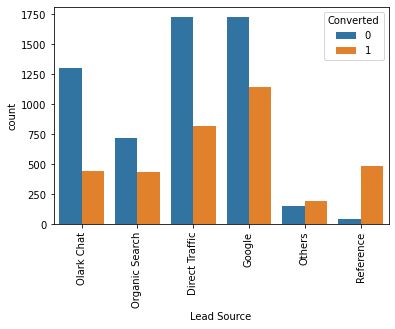

In [22]:
#Visualizing the Lead Source column w.r.t to Conerted
sns.countplot(lead["Lead Source"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Highest number of people which are converted from Google
- Converted to NOT converted ratio is highest for Reference, which means that there are high chances of converting when the leads are sourced from reference

### Dropping Rows where TotalVisits and Page Views Per Visit are null as Null perecentage is very low

In [23]:
#only 1.48% value are nulls, therfore dropping rows
lead = lead[~(lead['TotalVisits'].isnull())]

In [24]:
#only 1.48% value are nulls, therfore dropping rows
lead = lead[~(lead['Page Views Per Visit'].isnull())]

### Last Activity

In [25]:
round(lead["Last Activity"].value_counts(dropna=False, normalize=True)*100,2)

Email Opened                    37.82
SMS Sent                        29.93
Olark Chat Conversation         10.71
Page Visited on Website          7.05
Converted to Lead                4.72
Email Bounced                    3.44
Email Link Clicked               2.94
Form Submitted on Website        1.28
Unreachable                      0.99
Unsubscribed                     0.65
Had a Phone Conversation         0.28
View in browser link Clicked     0.07
Approached upfront               0.06
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

 - Here 'Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam' falls under one category, therefore renaming all this categories to 'Unreachable'

In [26]:
# replacing above columns with 'Unreachable'
lead["Last Activity"].replace(['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam'], 'Unreachable', inplace=True)
round(lead["Last Activity"].value_counts(dropna=False, normalize=True)*100,2)

Email Opened                    37.82
SMS Sent                        29.93
Olark Chat Conversation         10.71
Page Visited on Website          7.05
Unreachable                      5.10
Converted to Lead                4.72
Email Link Clicked               2.94
Form Submitted on Website        1.28
Had a Phone Conversation         0.28
View in browser link Clicked     0.07
Approached upfront               0.06
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [27]:
#Here replacing values having less than 4 percentage count
lead["Last Activity"].replace(['Email Link Clicked', 'Form Submitted on Website',
                               'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 
                              'Email Received', 'Visited Booth in Tradeshow', 'Resubscribed to emails',], 'Others', inplace=True)

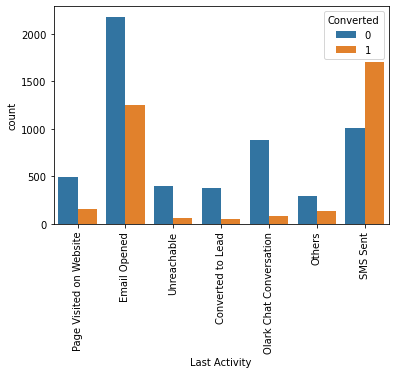

In [28]:
#Visualising Lead Activity w.r.t. Converted
sns.countplot(lead["Last Activity"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights
- SMS sent has the highest conersion rate and most number of the people got converted who were sent SMS

### Country

In [29]:
round(lead["Country"].value_counts(dropna=False, normalize=True)*100,2)

India                   71.53
NaN                     25.30
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.17
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.07
France                   0.07
unknown                  0.06
South Africa             0.04
Kuwait                   0.04
Germany                  0.04
Canada                   0.04
Nigeria                  0.04
Sweden                   0.03
Asia/Pacific Region      0.02
Uganda                   0.02
Ghana                    0.02
Netherlands              0.02
Philippines              0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
China                    0.02
Switzerland              0.01
Vietnam                  0.01
Kenya                    0.01
Indonesia                0.01
Sri Lanka 

In [30]:
#as the most number of value is India, thus replacing Nan with India
lead["Country"].fillna(value='India', inplace=True)
round(lead["Country"].value_counts(dropna=False, normalize=True)*100,2)

India                   96.84
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.17
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.07
France                   0.07
unknown                  0.06
Kuwait                   0.04
Nigeria                  0.04
South Africa             0.04
Canada                   0.04
Germany                  0.04
Sweden                   0.03
Belgium                  0.02
Philippines              0.02
China                    0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Uganda                   0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Malaysia                 0.01
Tanzania                 0.01
Denmark                  0.01
Vietnam                  0.01
Switzerland              0.01
Kenya     

As the 97% values are India, therefore removing the column 'Country'

In [31]:
lead.drop("Country", axis=1, inplace=True)

### Specialization

In [32]:
round(lead["Specialization"].value_counts(dropna=False, normalize=True)*100,2)

NaN                                  36.17
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Travel and Tourism                    2.23
Media and Advertising                 2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.10
Rural and Agribusiness                0.80
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [33]:
#We can assume that the null values as not specified as the users might not have any specialization
lead["Specialization"].fillna('Not_Specified', inplace=True)

In [34]:
round(lead["Specialization"].value_counts(dropna=False, normalize=True)*100,2)

Not_Specified                        36.17
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Media and Advertising                 2.23
Travel and Tourism                    2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.10
Rural and Agribusiness                0.80
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [35]:
#replacing levels having less tahn 4% count
lead["Specialization"].replace(['Supply Chain Management', 'Banking, Investment And Insurance', 'Travel and Tourism',
                                'Media and Advertising', 'International Business', 'Healthcare Management', 
                                'E-COMMERCE','Hospitality Management', 'Retail Management', 'Rural and Agribusiness', 
                                'E-Business', 'Services Excellence'], 'Others', inplace=True)

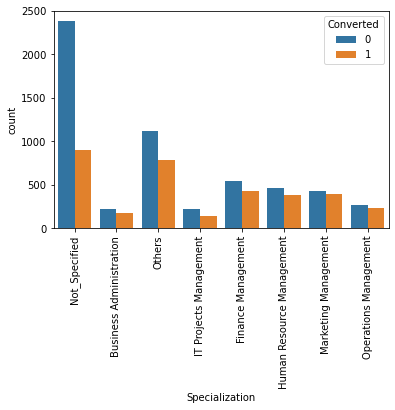

In [36]:
#visualizing the Specialization w.r.t. Converted
sns.countplot(lead["Specialization"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Not specified customers have highest not opted numbers 
- All other levels have almost same conversion rate

### What is your current occupation

In [37]:
round(lead["What is your current occupation"].value_counts(dropna=False, normalize=True)*100,2)

Unemployed              60.35
NaN                     29.57
Working Professional     7.46
Student                  2.27
Other                    0.17
Housewife                0.10
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [38]:
#We can assume that most of the null values as unemployed
lead["What is your current occupation"].fillna("Unemployed", inplace=True)
lead["What is your current occupation"].replace(["Housewife", "Businessman"], 'Other', inplace=True)

In [39]:
# renaming What is your current occupation to Current Occupation
lead.rename(columns={'What is your current occupation': 'Current Occupation'}, inplace=True)

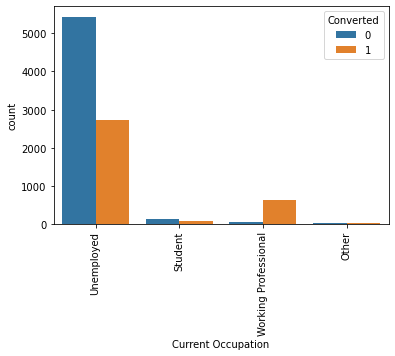

In [40]:
#Visualizing cuurent occupation w.r.t. Converted
sns.countplot(lead["Current Occupation"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Most of the count consists of unemployed people but Working Professional have highest conversion rate.

### What matters most to you in choosing a course

In [41]:
round(lead["What matters most to you in choosing a course"].value_counts(dropna=False, normalize=True)*100,2)

Better Career Prospects      70.20
NaN                          29.78
Other                         0.01
Flexibility & Convenience     0.01
Name: What matters most to you in choosing a course, dtype: float64

In [42]:
#replacing the Nan with mode of the column
lead["What matters most to you in choosing a course"].fillna("Better Career Prospects",inplace=True)
round(lead["What matters most to you in choosing a course"].value_counts(dropna=False, normalize=True)*100,2)

Better Career Prospects      99.98
Other                         0.01
Flexibility & Convenience     0.01
Name: What matters most to you in choosing a course, dtype: float64

In [43]:
#as almost all the values are Better Carre Prospedcts therefore dropping the column
lead.drop("What matters most to you in choosing a course", axis=1, inplace=True)

### Tags

In [44]:
round(lead["Tags"].value_counts(dropna=False, normalize=True)*100,2)

NaN                                                  36.67
Will revert after reading the email                  22.22
Ringing                                              13.08
Interested in other courses                           5.61
Already a student                                     5.12
Closed by Horizzon                                    3.32
switched off                                          2.64
Busy                                                  2.04
Lost to EINS                                          1.90
Not doing further education                           1.60
Interested  in full time MBA                          1.28
Graduation in progress                                1.22
invalid number                                        0.91
Diploma holder (Not Eligible)                         0.69
wrong number given                                    0.52
opp hangup                                            0.36
number not provided                                   0.

In [45]:
#filling NaN with mode and merging the rare levels and renaming to others 
lead["Tags"].fillna("Will revert after reading the email", inplace=True)
lead["Tags"].replace(['Not doing further education', 'Interested  in full time MBA', 'Graduation in progress', 'invalid number',
                     'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 
                     'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems'
                     ,'Still Thinking', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Lateral student',
                     'University not recognized', 'Shall take in the next coming month', 'Recognition issue (DEC approval)'], 
                    'Others', inplace=True)

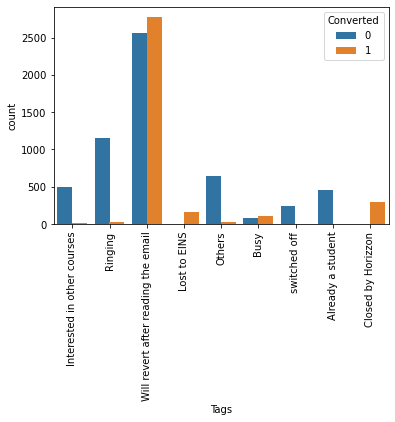

In [46]:
#Visualizing the Tags w.r.t Converted
sns.countplot(lead["Tags"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Will revert after reading the email have highest count in the column
- Closed by horizon have highest conersion rate while interested in other courses have lowest conversion rate

### Lead Quality

In [47]:
round(lead["Lead Quality"].value_counts(dropna=False, normalize=True)*100,2)

NaN                  52.02
Might be             16.74
Not Sure             11.97
Worst                 6.62
High in Relevance     6.52
Low in Relevance      6.13
Name: Lead Quality, dtype: float64

In [48]:
#we can assume that the person has not selected any option as he is not sure, so replacing NaN by Not Sure
lead["Lead Quality"].fillna("Not Sure", inplace=True)

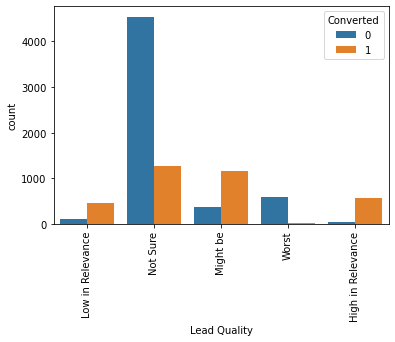

In [49]:
# Visualizing Lead Quality w.r.t Converted
sns.countplot(lead["Lead Quality"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
 - High in Relevance have high conversion rate
 - While people Not sure have lowest conversion rate

### City

In [50]:
round(lead["City"].value_counts(dropna=False, normalize=True)*100,2)

NaN                            39.40
Mumbai                         35.01
Thane & Outskirts               8.21
Other Cities                    7.49
Other Cities of Maharashtra     4.92
Other Metro Cities              4.15
Tier II Cities                  0.82
Name: City, dtype: float64

In [51]:
# filling Nan with mode of the column
lead["City"].fillna("Mumbai", inplace=True)

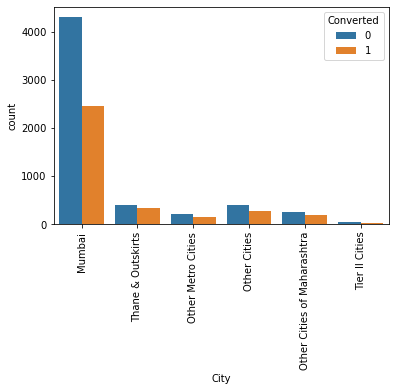

In [52]:
#visualizing the City w.r.t to Converted
sns.countplot(lead["City"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Mostly all the values are Mumbai in the City column, so we can conclude that the service is mostly used in Mumbai

### Asymmetrique Activity Index

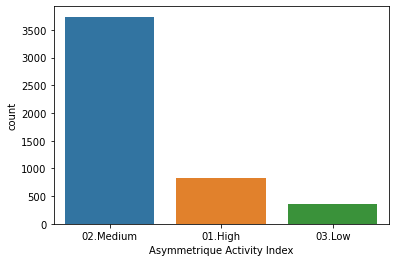

In [53]:
sns.countplot(lead["Asymmetrique Activity Index"])
plt.show()

### Asymmetrique Activity Score

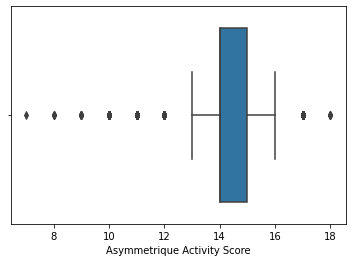

In [54]:
sns.boxplot(lead["Asymmetrique Activity Score"])
plt.show()

### Asymmetrique Profile Index

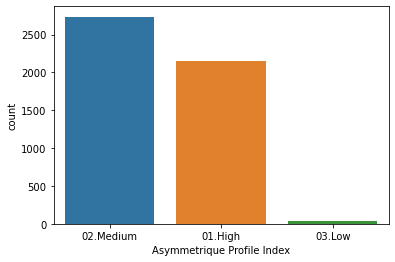

In [55]:
sns.countplot(lead["Asymmetrique Profile Index"])
plt.show()

### Asymmetrique Profile Score

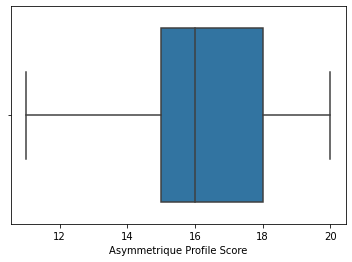

In [56]:
sns.boxplot(lead["Asymmetrique Profile Score"])
plt.show()

In [57]:
# all the above index and score have high variation and thus we should not impute the values 
#also null values are 45% therefore dropping the columns
lead.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 
                   'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1, inplace=True)

### Checking again for any nulls in the dataset

In [58]:
round(lead.isnull().sum()/len(lead.index)*100, 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Current Occupation                          0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Lead Quality                            

Since all the nulls are removed, then we can proceed for further analysis

### Lead Origin

In [59]:
round(lead["Lead Origin"].value_counts(dropna=False, normalize=True)*100,2)

Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: Lead Origin, dtype: float64

In [60]:
#removing the Lead Import level as it's count is very less
lead = lead[~(lead["Lead Origin"] == 'Lead Import')]

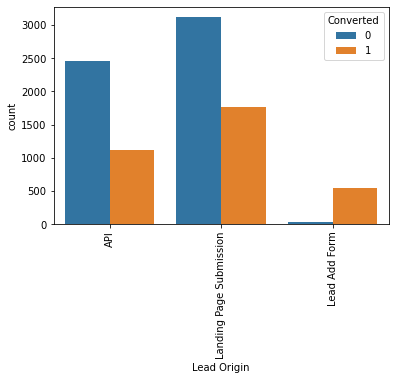

In [61]:
# visualizing the Lead Origin w.r.t Converted
sns.countplot(lead["Lead Origin"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Lead Add Form have highest conversion rate but the count is less
- Therefore organization should focus more on this

### Do Not Call

In [62]:
round(lead["Do Not Call"].value_counts(dropna=False, normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [63]:
#we can drop this column as almost all the values are No
lead.drop("Do Not Call", axis=1,inplace=True)

### Do Not Email

In [64]:
round(lead["Do Not Email"].value_counts(dropna=False, normalize=True)*100,2)

No     92.08
Yes     7.92
Name: Do Not Email, dtype: float64

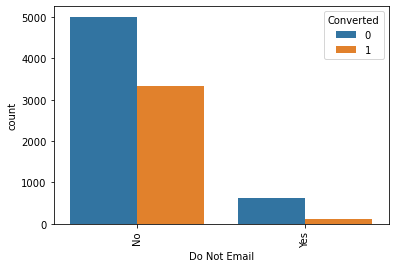

In [65]:
#visualizing the Do Not Email w.r.t Converted
sns.countplot(lead["Do Not Email"], hue=lead.Converted)
plt.xticks(rotation=90)
plt.show()

Insights:
- Most of the values are No for the Do Not Email

## Treating Outliers

### TotalVisits

In [66]:
#checking quantiles for totalVisits
lead["TotalVisits"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9044.000000
mean        3.466608
std         4.862671
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

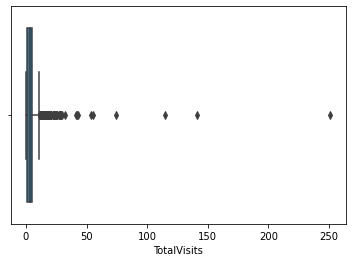

In [67]:
#boxplot for checking outliers
sns.boxplot(lead["TotalVisits"])
plt.show()

In [68]:
#we will cap the TotalVisits at 0.95 percentile to remove the outliers
lead = lead[(lead["TotalVisits"]<=lead["TotalVisits"].quantile(0.95)) & (lead["TotalVisits"]>=lead["TotalVisits"].quantile(0.05))]

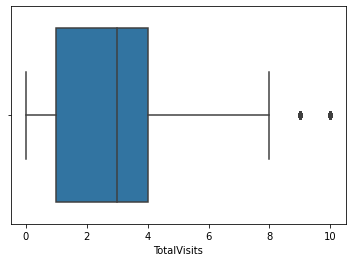

In [69]:
#again plotting boxplot for TotalVisits
sns.boxplot(lead["TotalVisits"])
plt.show()

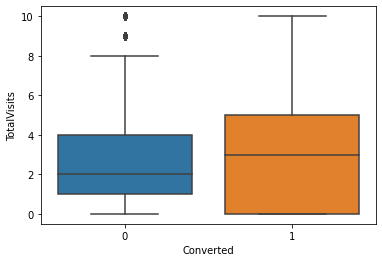

In [70]:
#plotting boxplot for TotalVisits against Converted
sns.boxplot(data=lead, x='Converted', y='TotalVisits')
plt.show()

Insights:
- People having higher visits are likely to convert more than lower visits

### Total Time Spent on Website

In [71]:
#checking qualtiles for Total Time Spent on Website
lead["Total Time Spent on Website"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    8691.000000
mean      474.771373
std       542.493286
min         0.000000
5%          0.000000
25%         4.000000
50%       238.000000
75%       901.000000
90%      1367.000000
95%      1551.000000
99%      1826.300000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

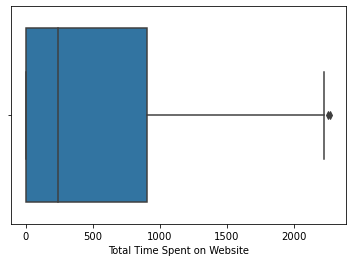

In [72]:
#plotting boxplot for Total Time Spent on Website
sns.boxplot(lead["Total Time Spent on Website"])
plt.show()

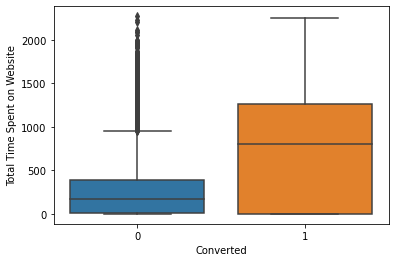

In [73]:
#plotting box plot for Total Time Spent on Website against Converted
sns.boxplot(data=lead, x='Converted', y='Total Time Spent on Website')
plt.show()

Insights:
 - People spending more time on wensite have higher chances of conversion

### Page Views Per Visit

In [74]:
#checking quantiles for Page Views per visit
lead["Page Views Per Visit"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    8691.000000
mean        2.262534
std         1.920298
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

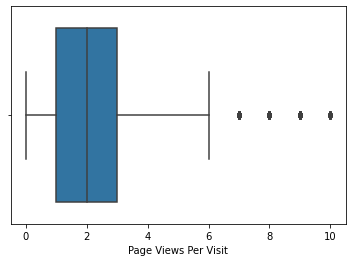

In [75]:
#box plot for Page Views per visit
sns.boxplot(lead["Page Views Per Visit"])
plt.show()

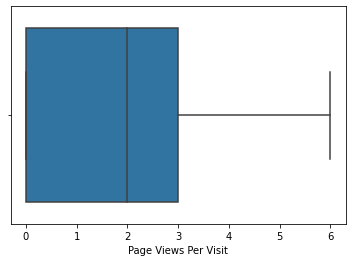

In [76]:
#treating outliers for Page Views Per Visit
lead = lead[(lead["Page Views Per Visit"]<=lead["Page Views Per Visit"].quantile(0.95)) & (lead["Page Views Per Visit"]>=lead["Page Views Per Visit"].quantile(0.05))]
sns.boxplot(lead["Page Views Per Visit"])
plt.show()

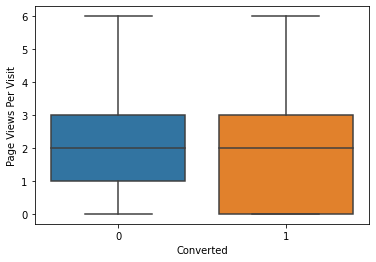

In [77]:
#boxplot for Page Views Per Visit against Converted
sns.boxplot(data=lead, x='Converted', y='Page Views Per Visit')
plt.show()

Insights:
- page Views per visit doesn't have much effect onm target variable as the median is same for both the categories

### Search

In [78]:
round(lead["Search"].value_counts(dropna=False, normalize=True)*100,2)

No     99.93
Yes     0.07
Name: Search, dtype: float64

In [79]:
#as almost all the values are same, we can drop this column
lead.drop("Search", axis=1,inplace=True)

### Magazine

In [80]:
round(lead["Magazine"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: Magazine, dtype: float64

In [81]:
#Drop the magzine column  
lead.drop("Magazine", axis=1,inplace=True)

### Newspaper Article

In [82]:
round(lead["Newspaper Article"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: Newspaper Article, dtype: float64

In [83]:
#Drop the Newspaper Article column
lead.drop("Newspaper Article", axis=1,inplace=True)

### Newspaper

In [84]:
round(lead["Newspaper"].value_counts(dropna=False, normalize=True)*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [85]:
#Drop the Newspaper column
lead.drop("Newspaper", axis=1,inplace=True)

### X Education Forums

In [86]:
round(lead["X Education Forums"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: X Education Forums, dtype: float64

In [87]:
#Drop X Education Forums column
lead.drop("X Education Forums", axis=1,inplace=True)

### Digital Advertisement

In [88]:
round(lead["Digital Advertisement"].value_counts(dropna=False, normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Digital Advertisement, dtype: float64

In [89]:
#Drop Digital Advertisement column
lead.drop("Digital Advertisement", axis=1,inplace=True)

### Through Recommendations

In [90]:
round(lead["Through Recommendations"].value_counts(dropna=False, normalize=True)*100,2)

No     99.96
Yes     0.04
Name: Through Recommendations, dtype: float64

In [91]:
#Drop Through Recommendations column
lead.drop("Through Recommendations", axis=1,inplace=True)

### Receive More Updates About Our Courses

In [92]:
round(lead["Receive More Updates About Our Courses"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [93]:
#Drop Receive More Updates About Our Courses column
lead.drop("Receive More Updates About Our Courses", axis=1,inplace=True)

### Update me on Supply Chain Content

In [94]:
round(lead["Update me on Supply Chain Content"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [95]:
#Drop Update me on Supply Chain Content column
lead.drop("Update me on Supply Chain Content", axis=1,inplace=True)

### Get updates on DM Content

In [96]:
round(lead["Get updates on DM Content"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [97]:
#Drop Get updates on DM Content column
lead.drop("Get updates on DM Content", axis=1,inplace=True)

### I agree to pay the amount through cheque

In [98]:
round(lead["I agree to pay the amount through cheque"].value_counts(dropna=False, normalize=True)*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [99]:
#Drop I agree to pay the amount through cheque column
lead.drop("I agree to pay the amount through cheque", axis=1,inplace=True)

### A free copy of Mastering The Interview

In [100]:
round(lead["A free copy of Mastering The Interview"].value_counts(dropna=False, normalize=True)*100,2)

No     69.88
Yes    30.12
Name: A free copy of Mastering The Interview, dtype: float64

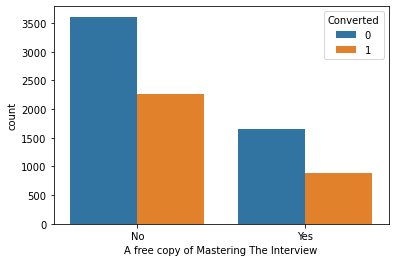

In [101]:
sns.countplot(lead["A free copy of Mastering The Interview"], hue=lead["Converted"])
plt.show()

Insights:
- Even though the No are high, but the conversion rate for both Yes and No are same 

### Last Notable Activity

In [102]:
round(lead["Last Notable Activity"].value_counts(dropna=False, normalize=True)*100,2)

Modified                        36.82
Email Opened                    30.76
SMS Sent                        23.86
Page Visited on Website          2.83
Olark Chat Conversation          2.06
Email Link Clicked               1.90
Email Bounced                    0.70
Unsubscribed                     0.51
Unreachable                      0.36
Had a Phone Conversation         0.12
Email Marked Spam                0.02
Email Received                   0.01
Resubscribed to emails           0.01
Form Submitted on Website        0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64

In [103]:
#Replace values have kess than 2% count 
lead["Last Notable Activity"].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                      'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 
                                       'Form Submitted on Website', 'Email Received', 'View in browser link Clicked', 
                                      'Resubscribed to emails'], 'Others', inplace=True)

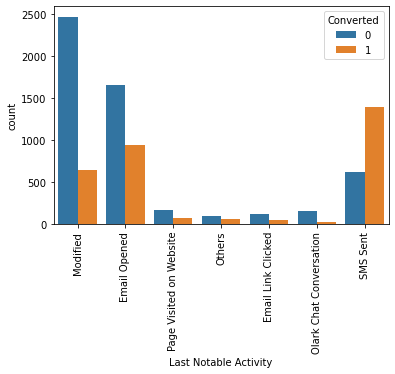

In [104]:
#plotting Last Notable activity w.r.t Converted
sns.countplot(lead["Last Notable Activity"], hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:
- The SMS sent to people have highest conversion rate for the Last notable activity


In [105]:
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

In [106]:
#mapping yes with 1 and no with 0
lead["Do Not Email"] = lead[["Do Not Email"]].apply(binary_map)

### Getting Dummy variables for categorical variables

In [107]:
#getting categorical variables
category_cols = lead.select_dtypes(include=['object']).columns
category_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Current Occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [108]:
#getting dummy variables for categorical variables
category_dummies = pd.get_dummies(data=lead[category_cols], drop_first=True)
category_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [109]:
#concatting the dummy features into lead dataframe
lead = pd.concat([lead, category_dummies], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not_Specified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not_Specified,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not_Specified,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [110]:
#removing the original categorical columns after getting dummies
lead.drop(category_cols, axis=1, inplace=True)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
#checking the final columns proceeding further
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   8416 non-null   int64  
 1   Converted                                      8416 non-null   int64  
 2   TotalVisits                                    8416 non-null   float64
 3   Total Time Spent on Website                    8416 non-null   int64  
 4   Page Views Per Visit                           8416 non-null   float64
 5   Lead Origin_Landing Page Submission            8416 non-null   uint8  
 6   Lead Origin_Lead Add Form                      8416 non-null   uint8  
 7   Lead Source_Google                             8416 non-null   uint8  
 8   Lead Source_Olark Chat                         8416 non-null   uint8  
 9   Lead Source_Organic Search                     8416 

# Model Building

In [112]:
from sklearn.model_selection import train_test_split

# defining target variable and Dependent Variables

y = lead.pop('Converted')
X = lead

In [113]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [114]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Split the data into train and test data set

In [115]:
#splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Rescaling the numerical features

In [116]:
#importing StandardScaler and using it for scaling the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_variables] = scaler.fit_transform(X_train[num_variables]) 
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6519,0,-0.314559,2.029671,-0.038001,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7518,0,-1.179064,-0.867375,-1.253082,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
349,0,-1.179064,-0.867375,-1.253082,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1474,0,-0.314559,1.555076,-0.038001,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7512,1,0.982199,-0.073940,1.784620,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1


In [117]:
import statsmodels.api as sm

In [118]:
#building the model using Logistic Regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5891
Model:                            GLM   Df Residuals:                     5839
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1220.4
Date:                Mon, 21 Jun 2021   Deviance:                       2440.9
Time:                        21:56:01   Pearson chi2:                 3.69e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.1344      1.652     -1.292      0.196      -5.372       1.104
Do Not Email                                     -1.4076      0.310     -4.539      0.000      -2.015      -0.800
TotalVisits                                       0.0532      0.087      0.609      0.542      -0.118       0.224
Total Time Spent on Website                       1.0438      0.064     16.418      0.000       0.919       1.168
Page Views Per Visit                             -0.1683      0.097     -1.734      0.083      -0.358       0.022
Lead Origin_Landing Page Submission              -0.6346      0.232     -2.730      0.006      -1.090      -0.179
Lead Origin_Lead Add Form                         4.6923      0.843      5.569      0.000       3.041       6.344
Lead Source_Google                               -0.0822      0.191     -0.431      0.666      -0.456       0.292
Lead Source_Olark Chat                            0.6757      0.253      2.665      0.008       0.179       1.172
Lead Source_Organic Search                        0.0062      0.226      0.028      0.978      -0.436       0.448
Lead Source_Others                                0.0733      0.429      0.171      0.864      -0.768       0.914
Lead Source_Reference                            -3.0382      0.942     -3.224      0.001      -4.885      -1.191
Last Activity_Email Opened                        0.3467      0.361      0.961      0.337      -0.361       1.054
Last Activity_Olark Chat Conversation            -0.6424      0.386     -1.666      0.096      -1.398       0.113
Last Activity_Others                              0.6442      0.434      1.484      0.138      -0.207       1.495
Last Activity_Page Visited on Website             0.3972      0.449      0.885      0.376      -0.482       1.276
Last Activity_SMS Sent                            1.4237      0.345      4.127      0.000       0.748       2.100
Last Activity_Unreachable                         0.3536      0.554      0.638      0.524      -0.733       1.440
Specialization_Finance Management                -0.1622      0.314     -0.517      0.605      -0.777       0.453
Specialization_Human Resource Management         -0.2910      0.321     -0.906      0.365      -0.920       0.338
Specialization_IT Projects Management            -0.0681      0.384     -0.177      0.859      -0.820       0.684
Specialization_Marketing Management               0.1913      0.317      0.603      0.546      -0.430       0.813
Specialization_Not_Specified                     -0.4530      0.331     -1.367      0.172      -1.103       0.197
Specialization_Operations Management              0.0408      0.363      0.112      0.911      -0.670       0.752
Speci

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [120]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [121]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 19),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_SMS Sent', False, 5),
 ('Last Activity_Unreachable', False, 20),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Human Resource Management', False, 26),
 ('Specialization_IT Projects Management', False, 37),
 ('Specialization_Marketing Management', False, 14),
 ('Specialization_Not_Specified', False, 16),
 ('Specialization_Operations Management',

In [122]:
#columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [123]:
# columsn dropped by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management', 'Specialization_Not_Specified',
       'Specialization_Operations Management', 'Specialization_Others',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts

In [124]:
# building model using the top RFE 15 columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5891
Model:                            GLM   Df Residuals:                     5875
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.7
Date:                Mon, 21 Jun 2021   Deviance:                       2889.5
Time:                        21:56:02   Pearson chi2:                 2.96e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8338      1.038     -2.730      0.006      -4.868      -0.799
Do Not Email                                -1.3385      0.225     -5.957      0.000      -1.779      -0.898
Lead Origin_Lead Add Form                    4.2515      0.732      5.806      0.000       2.816       5.687
Lead Source_Reference                       -2.8175      0.838     -3.362      0.001      -4.460      -1.175
Last Activity_Olark Chat Conversation       -1.5471      0.201     -7.707      0.000      -1.941      -1.154
Tags_Busy                                    5.0926      1.069      4.763      0.000       2.997       7.188
Tags_Closed by Horizzon                      8.8253      1.285      6.869      0.000       6.307      11.343
Tags_Interested in other courses             1.0439      1.093      0.955      0.339      -1.098       3.186
Tags_Lost to EINS                            9.4199      1.157      8.143      0.000       7.153      11.687
Tags_Others                                  1.0270      1.072      0.958      0.338      -1.074       3.127
Tags_Ringing                                -0.4868      1.073     -0.454      0.650      -2.590       1.617
Tags_Will revert after reading the email     5.0476      1.042      4.844      0.000       3.005       7.090
Tags_switched off                           -1.2451      1.213     -1.026      0.305      -3.623       1.133
Lead Quality_Not Sure                       -3.4565      0.133    -25.953      0.000      -3.718      -3.195
Lead Quality_Worst                          -3.6645      0.890     -4.119      0.000      -5.408      -1.921
Last Notable Activity_SMS Sent               2.4084      0.122     19.763      0.000       2.170       2.647
============================================================================================================
"""

Dropping the Tags_Ringing column as p-value is greater than 0.05 therefore feature is insignificant

In [125]:
col1 = col.drop("Tags_Ringing",1)

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5891
Model:                            GLM   Df Residuals:                     5876
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.8
Date:                Mon, 21 Jun 2021   Deviance:                       2889.7
Time:                        21:56:02   Pearson chi2:                 2.93e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2945      0.267    -12.345      0.000      -3.818      -2.771
Do Not Email                                -1.3379      0.225     -5.956      0.000      -1.778      -0.898
Lead Origin_Lead Add Form                    4.2510      0.732      5.806      0.000       2.816       5.686
Lead Source_Reference                       -2.8196      0.838     -3.366      0.001      -4.461      -1.178
Last Activity_Olark Chat Conversation       -1.5474      0.201     -7.709      0.000      -1.941      -1.154
Tags_Busy                                    5.5547      0.359     15.474      0.000       4.851       6.258
Tags_Closed by Horizzon                      9.2857      0.803     11.558      0.000       7.711      10.860
Tags_Interested in other courses             1.5034      0.440      3.414      0.001       0.640       2.366
Tags_Lost to EINS                            9.8766      0.595     16.612      0.000       8.711      11.042
Tags_Others                                  1.4848      0.396      3.749      0.000       0.709       2.261
Tags_Will revert after reading the email     5.5086      0.279     19.739      0.000       4.962       6.056
Tags_switched off                           -0.7808      0.668     -1.170      0.242      -2.089       0.528
Lead Quality_Not Sure                       -3.4558      0.133    -25.954      0.000      -3.717      -3.195
Lead Quality_Worst                          -3.5983      0.882     -4.079      0.000      -5.327      -1.869
Last Notable Activity_SMS Sent               2.4040      0.121     19.809      0.000       2.166       2.642
============================================================================================================
"""

Dropping the Tags_switched off column as p-value is greater than 0.05 therefore feature is insignificant

In [127]:
col2 = col1.drop("Tags_switched off",1)

In [128]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5891
Model:                            GLM   Df Residuals:                     5877
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1445.6
Date:                Mon, 21 Jun 2021   Deviance:                       2891.2
Time:                        21:56:02   Pearson chi2:                 2.62e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4282      0.251    -13.664      0.000      -3.920      -2.936
Do Not Email                                -1.3457      0.224     -6.003      0.000      -1.785      -0.906
Lead Origin_Lead Add Form                    4.2514      0.732      5.806      0.000       2.816       5.687
Lead Source_Reference                       -2.7982      0.839     -3.334      0.001      -4.443      -1.153
Last Activity_Olark Chat Conversation       -1.5481      0.201     -7.715      0.000      -1.941      -1.155
Tags_Busy                                    5.6864      0.348     16.348      0.000       5.005       6.368
Tags_Closed by Horizzon                      9.4136      0.799     11.780      0.000       7.847      10.980
Tags_Interested in other courses             1.6359      0.431      3.794      0.000       0.791       2.481
Tags_Lost to EINS                           10.0061      0.588     17.005      0.000       8.853      11.159
Tags_Others                                  1.6182      0.385      4.198      0.000       0.863       2.374
Tags_Will revert after reading the email     5.6394      0.265     21.273      0.000       5.120       6.159
Lead Quality_Not Sure                       -3.4512      0.133    -25.926      0.000      -3.712      -3.190
Lead Quality_Worst                          -3.5881      0.883     -4.063      0.000      -5.319      -1.857
Last Notable Activity_SMS Sent               2.3999      0.121     19.775      0.000       2.162       2.638
============================================================================================================
"""

In [129]:
#Prediciting the results by using above model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6519    0.011213
7518    0.769765
349     0.001102
1474    0.001028
7512    0.453702
905     0.001028
5151    0.224439
1825    0.005254
919     0.140637
3584    0.005162
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01121256, 0.76976538, 0.00110231, 0.00102775, 0.45370186,
       0.00102775, 0.22443919, 0.00525422, 0.14063723, 0.00516235])

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.011213,6519
1,0,0.769765,7518
2,0,0.001102,349
3,0,0.001028,1474
4,0,0.453702,7512


In [132]:
#taking the probability cuttof as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.011213,6519,0
1,0,0.769765,7518,1
2,0,0.001102,349,0
3,0,0.001028,1474,0
4,0,0.453702,7512,0


In [133]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3504  144]
 [ 329 1914]]


In [134]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9197080291970803


### Checking the VIF values for all the features

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.48
2,Lead Source_Reference,4.44
12,Last Notable Activity_SMS Sent,3.51
10,Lead Quality_Not Sure,3.04
9,Tags_Will revert after reading the email,1.67
8,Tags_Others,1.30
3,Last Activity_Olark Chat Conversation,1.24
6,Tags_Interested in other courses,1.21
5,Tags_Closed by Horizzon,1.15
11,Lead Quality_Worst,1.14


AS all the VIF values are under 5 so need to remove any features and we can proceed with selected features

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8533214444939813

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.9605263157894737

In [140]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.039473684210526314


In [141]:
# positive predictive value 
print (TP / float(TP+FP))

0.9300291545189504


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9141664492564571


# Plotting ROC curve

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

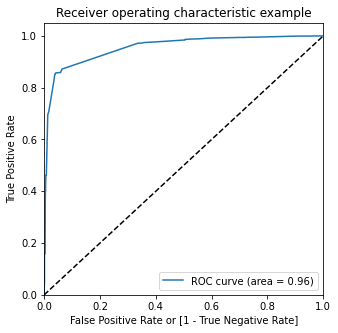

In [145]:
#plotting the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plotting Accuracy, sensitivity and specificity

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011213,6519,0,1,0,0,0,0,0,0,0,0,0
1,0,0.769765,7518,1,1,1,1,1,1,1,1,1,0,0
2,0,0.001102,349,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001028,1474,0,1,0,0,0,0,0,0,0,0,0
4,0,0.453702,7512,0,1,1,1,1,1,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380750  1.000000  0.000000
0.1   0.1  0.768121  0.974588  0.641173
0.2   0.2  0.781531  0.971913  0.664474
0.3   0.3  0.919538  0.857334  0.957785
0.4   0.4  0.919708  0.857334  0.958059
0.5   0.5  0.919708  0.853321  0.960526
0.6   0.6  0.919199  0.851984  0.960526
0.7   0.7  0.916992  0.841730  0.963268
0.8   0.8  0.875573  0.693714  0.987390
0.9   0.9  0.873875  0.689255  0.987390


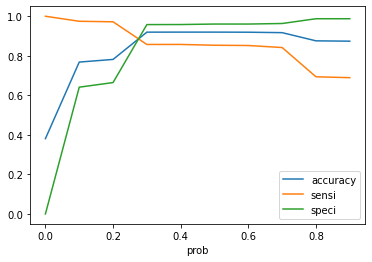

In [148]:
#plotting accuracy, sensitivity and specificity for deifferent probability cuttofs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [149]:
#taking the probability cuttof from above graph as 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011213,6519,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.769765,7518,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.001102,349,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001028,1474,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.453702,7512,0,1,1,1,1,1,0,0,0,0,0,1


In [150]:
#Calcualting the lead score for train data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.011213,6519,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.769765,7518,1,1,1,1,1,1,1,1,1,0,0,1,77
2,0,0.001102,349,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.001028,1474,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.453702,7512,0,1,1,1,1,1,0,0,0,0,0,1,45


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9195382787302665

In [152]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3494,  154],
       [ 320, 1923]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8573339277753009

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.9577850877192983

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.042214912280701754


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9258545979778526


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9160985841636078


In [159]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3504,  144],
       [ 329, 1914]], dtype=int64)

In [160]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9300291545189504

In [161]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8533214444939813

# Precision and Recall Curve

In [162]:
from sklearn.metrics import precision_score, recall_score

In [163]:
#calculating precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9300291545189504

In [164]:
#calcualting recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8533214444939813

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5886    0
 5887    0
 5888    0
 5889    0
 5890    0
 Name: Converted, Length: 5891, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 5886    0
 5887    0
 5888    0
 5889    0
 5890    0
 Name: predicted, Length: 5891, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

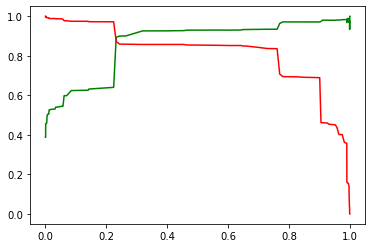

In [168]:
#plotting precision and recall curve for finding the optimal probability
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Prediciting on test data

In [169]:
#transforming the numerical variables according to the fit_transform from train
X_test[num_variables] = scaler.transform(X_test[num_variables])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not_Specified,Specialization_Operations Management,Specialization_Others,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
869,0,0.549946,-0.775755,-0.445053,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3470,0,-0.314559,-0.308489,-0.038001,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8217,0,0.549946,-0.447753,1.177079,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1239,0,-0.314559,-0.689631,-0.038001,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
4279,0,-1.179064,-0.867375,-1.253082,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [170]:
# Taking only columns required for predicting
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
869,0,0,0,0,0,0,0,0,0,0,1,0,0
3470,0,0,0,0,0,0,1,0,0,0,0,0,0
8217,0,0,0,0,0,0,0,0,0,0,0,0,1
1239,0,0,0,0,0,0,0,0,0,0,1,0,0
4279,0,0,0,0,0,0,0,0,0,1,1,0,0


In [171]:
#adding connstant to data set
X_test_sm = sm.add_constant(X_test)

In [172]:
#prediciting the probability
y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

869     0.001028
3470    0.142794
8217    0.263421
1239    0.001028
4279    0.224439
6532    0.761320
8584    0.005254
231     0.001028
7447    0.224439
2183    0.224439
dtype: float64

In [174]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Let's see the head
y_pred_1.head()

,0
869,0.001028
3470,0.142794
8217,0.263421
1239,0.001028
4279,0.224439


In [176]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [178]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,869,0.001028
1,0,3470,0.142794
2,0,8217,0.263421
3,0,1239,0.001028
4,0,4279,0.224439


In [181]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [182]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [183]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,869,0,0.001028
1,3470,0,0.142794
2,8217,0,0.263421
3,1239,0,0.001028
4,4279,0,0.224439


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [185]:
y_pred_final['lead_score'] = y_pred_final.Converted_prob.apply(lambda x:round(x*100))

In [186]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,lead_score
0,869,0,0.001028,0,0
1,3470,0,0.142794,0,14
2,8217,0,0.263421,0,26
3,1239,0,0.001028,0,0
4,4279,0,0.224439,0,22


In [187]:
#checking the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9148514851485149

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1540,   72],
       [ 143,  770]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8433734939759037

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.9553349875930521

### Accuracy, Sensitivity and Specificity on Test Data Set

- Accuracy: 91.48%
- Sensitivity: 84.33%
- Specificity: 95.53%